<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

<font size=5><p style="color:purple"> EDA and Visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>We have 0 missing values which is very good.
Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors 

Text(0.5, 1.0, 'Distribution of Charges')

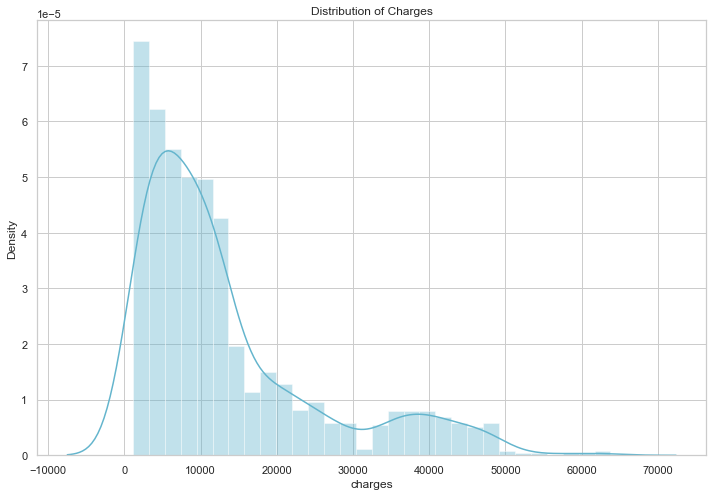

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<font size='2' font>This distribution is right-skewed. To make it closer to normal we can apply natural log 

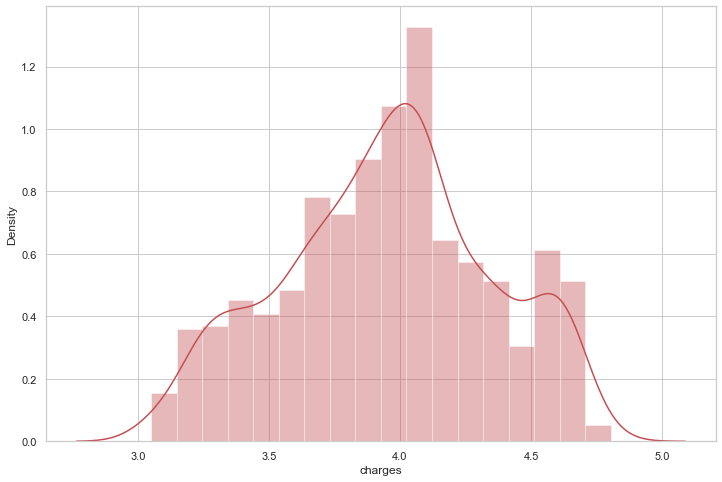

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<font size=2> Now let's look at the charges by region

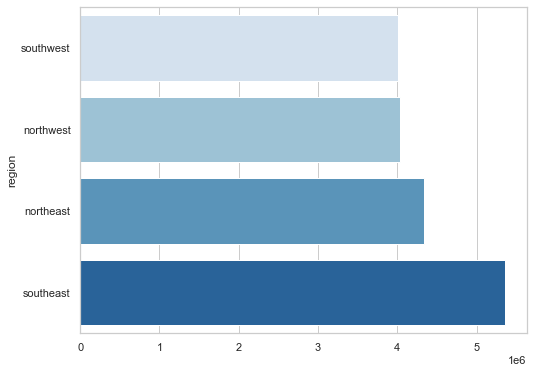

In [10]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.head().values, y=charges.head().index, palette='Blues', ax=ax)
plt.show()


<font size='2' font>So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region 

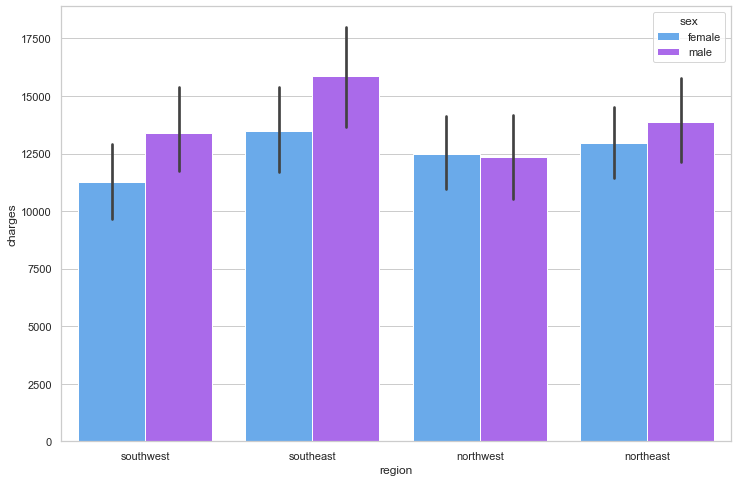

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

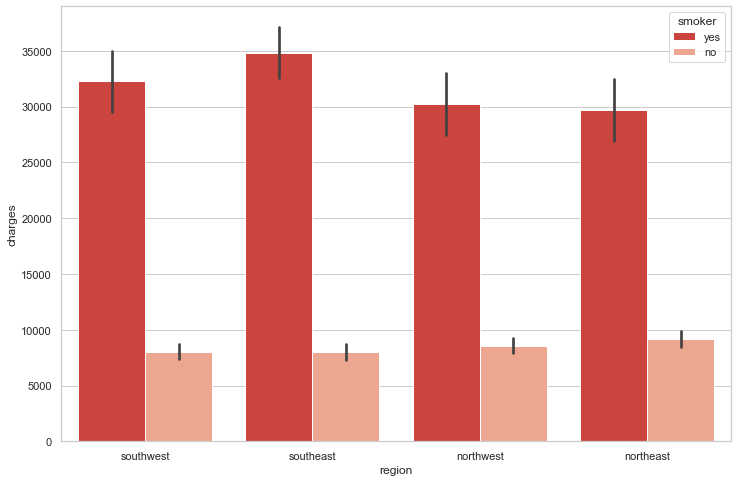

In [12]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

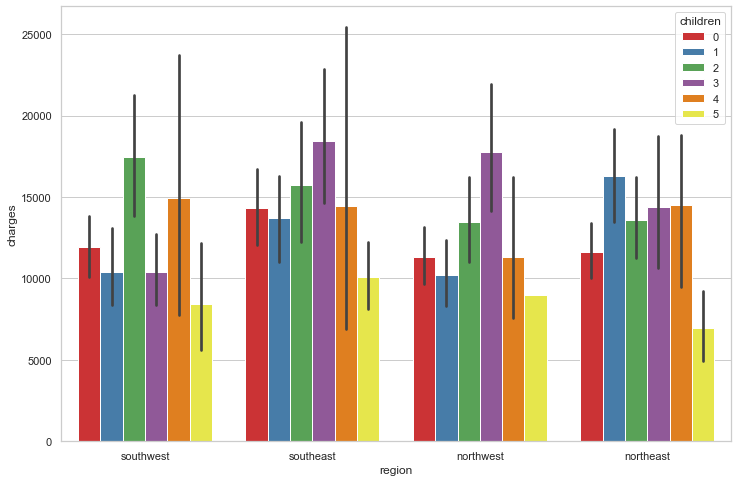

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

<font size='2' font>Now let's analyze the medical charges by age, bmi and children according to the smoking factor 

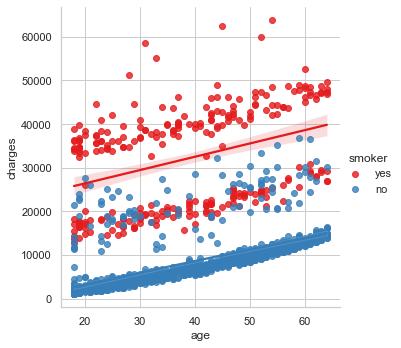

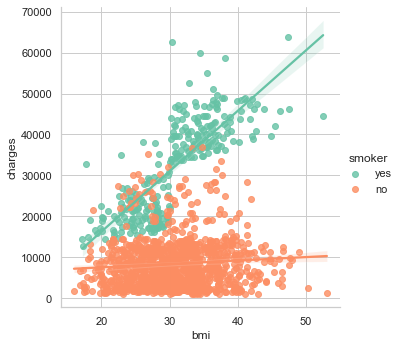

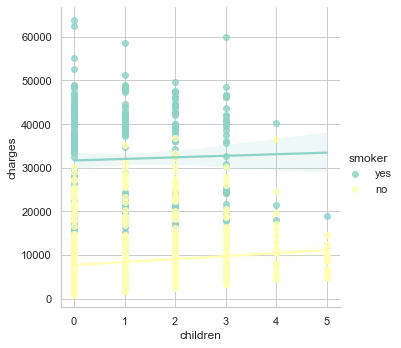

In [14]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

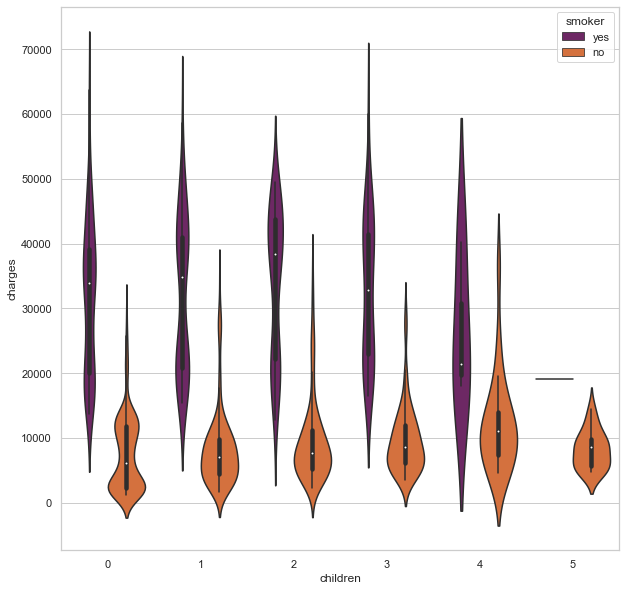

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [16]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())

df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

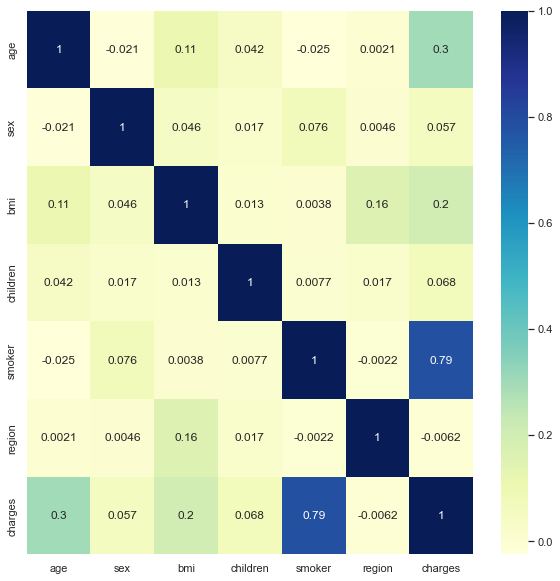

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<font size='2' font>No correlation, except with the smoking 

<font size=5><p style="color:purple"> Linear Regression

In [25]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.3, random_state=0)

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11827.7331417957
[  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]
0.7911113876316933


<font size='2' font>The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

In [28]:
# Predicting the test set results
y_pred = Lin_reg.predict(x_test)

# Calculating R²
r2 = Lin_reg.score(x_test, y_test)

# Calculating MAE
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculating MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R²: 0.7911113876316933
MAE: 4013.692985781201
MSE: 33311355.28185997
RMSE: 5771.599022962351


In [29]:
import statsmodels.api as sm

# Adding a constant to the model (it's a best practice)
x_train_sm = sm.add_constant(x_train)

# Fitting the regression model
model = sm.OLS(y_train, x_train_sm).fit()

# Printing the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          1.32e-260
Time:                        12:55:23   Log-Likelihood:                -9495.8
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1157.908    -10.215      0.0

In [32]:
import statsmodels.api as sm

# Adding a constant to the model (it's a best practice)
x_train_sm = sm.add_constant(x_train)
x_train_sm = x_train_sm.drop(['sex', 'region'], axis = 1)

# Fitting the regression model
model = sm.OLS(y_train, x_train_sm).fit()

# Printing the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     629.4
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          6.32e-263
Time:                        13:28:20   Log-Likelihood:                -9496.9
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     931   BIC:                         1.903e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.207e+04   1135.114    -10.637      0.0